In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import math

In [2]:
# directory

PATH = '/home/users/dwest77/tbworkexp/01/'
data = os.listdir(PATH)

In [ ]:
data

In [3]:
# clean up the files, use only the first which ave unique numbers.

identifier = {}
for file in data:
    key= file[73:80]
    if key in identifier:
        pass
#this file type has already been saved into the dictionary
    else:
        identifier[key] = file

print(identifier)

{'750_799': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc', '000_049': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc', '050_099': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc', '700_749': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc', '650_699': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001134759z_20071001152951z_650_699-v1000.nc', '600_649': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001152959z_20071001170855z_600_649-v1000.nc', '550_599': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001185055z_20071001202951z_550_599-v1000.nc'}


In [4]:
# transform the dictionary of file names into a list of usable files

uniquely_identified_files = list(identifier.values())
print(uniquely_identified_files)

['ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001134759z_20071001152951z_650_699-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001152959z_20071001170855z_600_649-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001185055z_20071001202951z_550_599-v1000.nc']


In [33]:
# test these files with their directoru (see if they fit the set)

file_name_and_path = '/home/users/dwest77/tbworkexp/01/'
# testing the directory (as it had changed from my last notebook)
first_file = file_name_and_path + data[0]
xr.open_mfdataset(first_file).satzen

<xarray.DataArray 'satzen' (npi: 1680)>
dask.array<open_dataset-41bab4a422ab195de68c00b20a78fd37satzen, shape=(1680,), dtype=float32, chunksize=(1680,), chunktype=numpy.ndarray>
Dimensions without coordinates: npi
Attributes:
    long_name:      Sensor view zenith angle
    standard_name:  sensor_zenith_angle
    units:          degree
    valid_min:      -1e+30
    valid_max:      1e+30

In [34]:
# create a function that takes in files, scrapes them of specific data variables needed.
# Can be used for all variables.

def concat(data, var, dimension):
    # PARAMETERS: data- the list of chosen files that I am working with, var- the variable within the array I am searching for to create the plot, dimension- the unit that I am concatenating with
    # ARGUMENTS: var_data: the concatenated list of all the data that I am working with. This is ready to be plot.
    var_data = []
    for file in data:
        file_direction = file_name_and_path + file
        current_file_var_data = xr.open_mfdataset(file_direction)[var]
        var_data.append(current_file_var_data)
        print(file)
        

    var_data = xr.concat(var_data, dim='npi')
    return var_data

In [35]:
# Define variables to be plotted,

satzen_values = concat(uniquely_identified_files, 'satzen', 'npi')
long_values = concat(uniquely_identified_files, 'longitude', 'npi')
lat_values = concat(uniquely_identified_files, 'latitude', 'npi')

ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001134759z_20071001152951z_650_699-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001152959z_20071001170855z_600_649-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001185055z_20071001202951z_550_599-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc
ral-l2p-tq

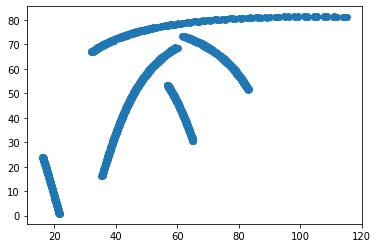

In [36]:
# For using the sensor zenith angle, we want the values that satisfy |satzen_value| < 1.5 (or as close to 0 as possible)

lat_filter = lat_values[satzen_values < 1.5]
long_filter = long_values[satzen_values < 1.5]
plt.scatter(long_filter, lat_filter)
plt.show()

In [7]:
# remodel the function, to fit the mismatched files.

def concat(data, var, dimension, moving=False):
    # PARAMETERS: data- the list of chosen files that I am working with, var- the variable within the array I am searching for to create the plot, dimension- the unit that I am concatenating with
    # ARGUMENTS: var_data: the concatenated list of all the data that I am working with. This is ready to be plot.
    movement_index = [0, 0, 0, 25, 100, 125, 175]
    var_data = []
    iterations = 0
    file_name_and_path = '/home/users/dwest77/tbworkexp/01/'
    for file in data:
        file_direction = file_name_and_path + file
        current_file_var_data = xr.open_mfdataset(file_direction)[var]
        if moving:
            current_file_var_data += movement_index[iterations]

        iterations += 1
        var_data.append(current_file_var_data)
        print(file)
    var_data = xr.concat(var_data, dim='npi')
    return var_data

In [8]:
## RESET

# 1
satzen_values = concat(uniquely_identified_files, 'satzen', 'npi')
long_values = concat(uniquely_identified_files, 'longitude', 'npi', True)
lat_values = concat(uniquely_identified_files, 'latitude', 'npi')

ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001134759z_20071001152951z_650_699-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001152959z_20071001170855z_600_649-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001185055z_20071001202951z_550_599-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc
ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc
ral-l2p-tq

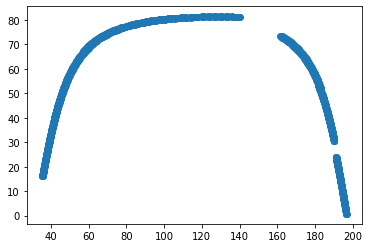

In [9]:
## Diagram fits much better. This almost simulates a proper half flight path.
# 2

lat_filter = lat_values[satzen_values < 1.5]
long_filter = long_values[satzen_values < 1.5]
plt.scatter(long_filter, lat_filter)
plt.show()

(1256,) (1256,)


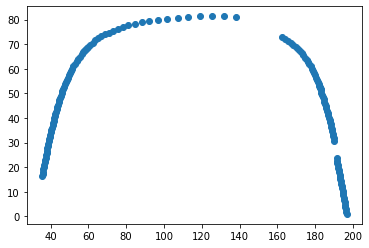

In [10]:
## New Average Graph, to create: follow the comment order, starting with the defining the values to be used.

# 3

long_filter = np.array(long_filter)
lat_filter = np.array(lat_filter)
print(long_filter.shape, lat_filter.shape)

# 4

long_filter = list(np.reshape(long_filter, (157, 8)))
lat_filter = list(np.reshape(lat_filter, (157, 8)))

# 5

mean_of_lat = []
mean_of_long = []
for group_of_data in lat_filter:
    mean_of_lat.append(np.mean(group_of_data, None))

for group_of_data in long_filter:
    mean_of_long.append(np.mean(group_of_data, None))

# 6

plt.scatter(mean_of_long, mean_of_lat)
plt.show()

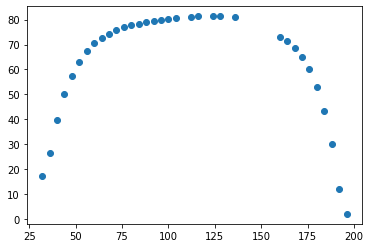

In [11]:
## Above graph has inconsistant points, the below program is run to make the points in conistant bins of 4 degrees. This means that you have around 42 bins.
long_buckets = []
for x in range(0, 200, 4):
    long_buckets.append(x)

## Create the bins array (2-dimensional)
lat_buckets = []
for x in range(0, len(long_buckets)):
    lat_buckets.append([])


# For every data value within the means of latitude array, find the correct bucket and add it to the corrrect array in lat_buckets
for x in range(len(mean_of_lat)):
    current_latitudanal_value = mean_of_lat[x]
    current_longitudanal_value = mean_of_long[x]
    bucket_id = (current_longitudanal_value)/4
    bucket_id = math.floor(bucket_id)
    lat_buckets[bucket_id].append(current_latitudanal_value)
    

# find the mean of values in each bin, although you need to differentiate from zero values.
mean_of_lat_buckets = []
mean_of_long_buckets = []
for bid, bucket in enumerate(lat_buckets):
    total = 0
    for val in bucket:
        total += val
    if len(bucket) != 0:
        total = total / len(bucket)
        mean_of_lat_buckets.append(total)
        mean_of_long_buckets.append(long_buckets[bid])


# present the graph
plt.scatter(mean_of_long_buckets, mean_of_lat_buckets)
plt.show()

In [1]:
# Although this is useful, the graph above is half an orbit (we need to know how much a full orbit is
# Initial thought: Use days 02-03 to see if they have negatie latitudes, they do not >:(
# Next though, reflect and translate day 01 so that there is a full orbit.
# Below code should do this fine.

second_array = []
for value in mean_of_lat_buckets:
    value = value * -1
    second_array.append(value)

print(second_array)
full_lat_movement = mean_of_lat_buckets + second_array


temp_long_movement = mean_of_long_buckets + mean_of_long_buckets
full_long_movement = []
half_of_list = len(temp_long_movement) // 2
print(half_of_list)
for value in temp_long_movement[half_of_list:]:
    value -= 168 ## rough translation estimate
    full_long_movement.append(value)

full_long_movement = mean_of_long_buckets + full_long_movement
print(full_long_movement)

plt.scatter(full_long_movement, full_lat_movement)



NameError: name 'mean_of_lat_buckets' is not defined

In [13]:
## This cell is reserved for calculation of timings.
## First, we need to scrape all the data for time in milliseconds.

file_path =  '/home/users/dwest77/tbworkexp/01/' #These are variables because it then makes the function itself reusable for different variables 
chosen_var = 'sensingtime_msec'

def finding_var_diff(var, file_path, file_name):
    ## Parameters: var- variable chosen, file_path and name are fairly self-explanitary
    open_file = np.array(xr.open_mfdataset(file_path + file_name)[var])

    min_var = np.min(open_file)
    max_var  = np.max(open_file)
    min_avr = min_var / len(open_file)
    max_avr = max_var / len(open_file)
    return max_avr - min_avr

## Need another function to find the length of the files
def finding_length_of_file(var, file_path, file_name):
    open_file = np.array(xr.open_mfdataset(file_path + file_name)[var])
    length = len(open_file)
    return length


In [16]:
## for loop iterates of all files to make sure that the means can be calculated properly.

list_of_time_avrs = []
list_of_lengths_files = []
for file in uniquely_identified_files:
    time_difference = finding_var_diff(chosen_var, file_path, file)
    length_of_file = finding_length_of_file(chosen_var, file_path, file)
    list_of_lengths_files.append(length_of_file)
    list_of_time_avrs.append(time_difference)

print(list_of_time_avrs)
print(list_of_lengths_files)

[61.90476190476147, 65.33183333333272, 65.33133333333353, 65.33183333333363, 65.33183333333182, 65.33200000000033, 65.33183333333363]
[1680, 6000, 6000, 6000, 6000, 6000, 6000]


In [18]:
## Since the file sizes are not uniform, need to create a weighted mean:
sum = 0
denom = 0
for i in range(len(list_of_time_avrs)):
    sum += list_of_lengths_files[i] * list_of_time_avrs[i]
    denom += list_of_lengths_files[i]


mean_dist_of_points = sum / denom
print(mean_dist_of_points)

65.17898089171958


In [23]:
## 65.17898089171958 is the time between two points. We need to multiply this by the number of points.
n_points = 0
for val in list_of_lengths_files:
    n_points += val

total_time_msecs = (n_points) * mean_dist_of_points * 2
print(total_time_msecs)

4911887.999999987


In [24]:
## Translate into seconds
total_time_secs = total_time_msecs *0.001
print(total_time_secs)

4911.887999999987


In [25]:
## Translate to mins
total_time_in_min = total_time_secs / 60
print(total_time_in_min)

81.86479999999979
